In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
df=pd.read_csv("diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0
...,...,...,...,...,...,...,...,...,...
1995,2,75,64,24,55,29.7,0.370,33,0
1996,8,179,72,42,130,32.7,0.719,36,1
1997,6,85,78,0,0,31.2,0.382,42,0
1998,0,129,110,46,130,67.1,0.319,26,1


In [2]:
# DATA CLEANING

In [3]:
# replace the 0 values from[''glucoe ,bloodpresure , skinthickness]
df_copy=df.copy(deep=True)
df_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']]=df_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)
df_copy.isnull().sum()

Pregnancies                   0
Glucose                      13
BloodPressure                90
SkinThickness               573
Insulin                     956
BMI                          28
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

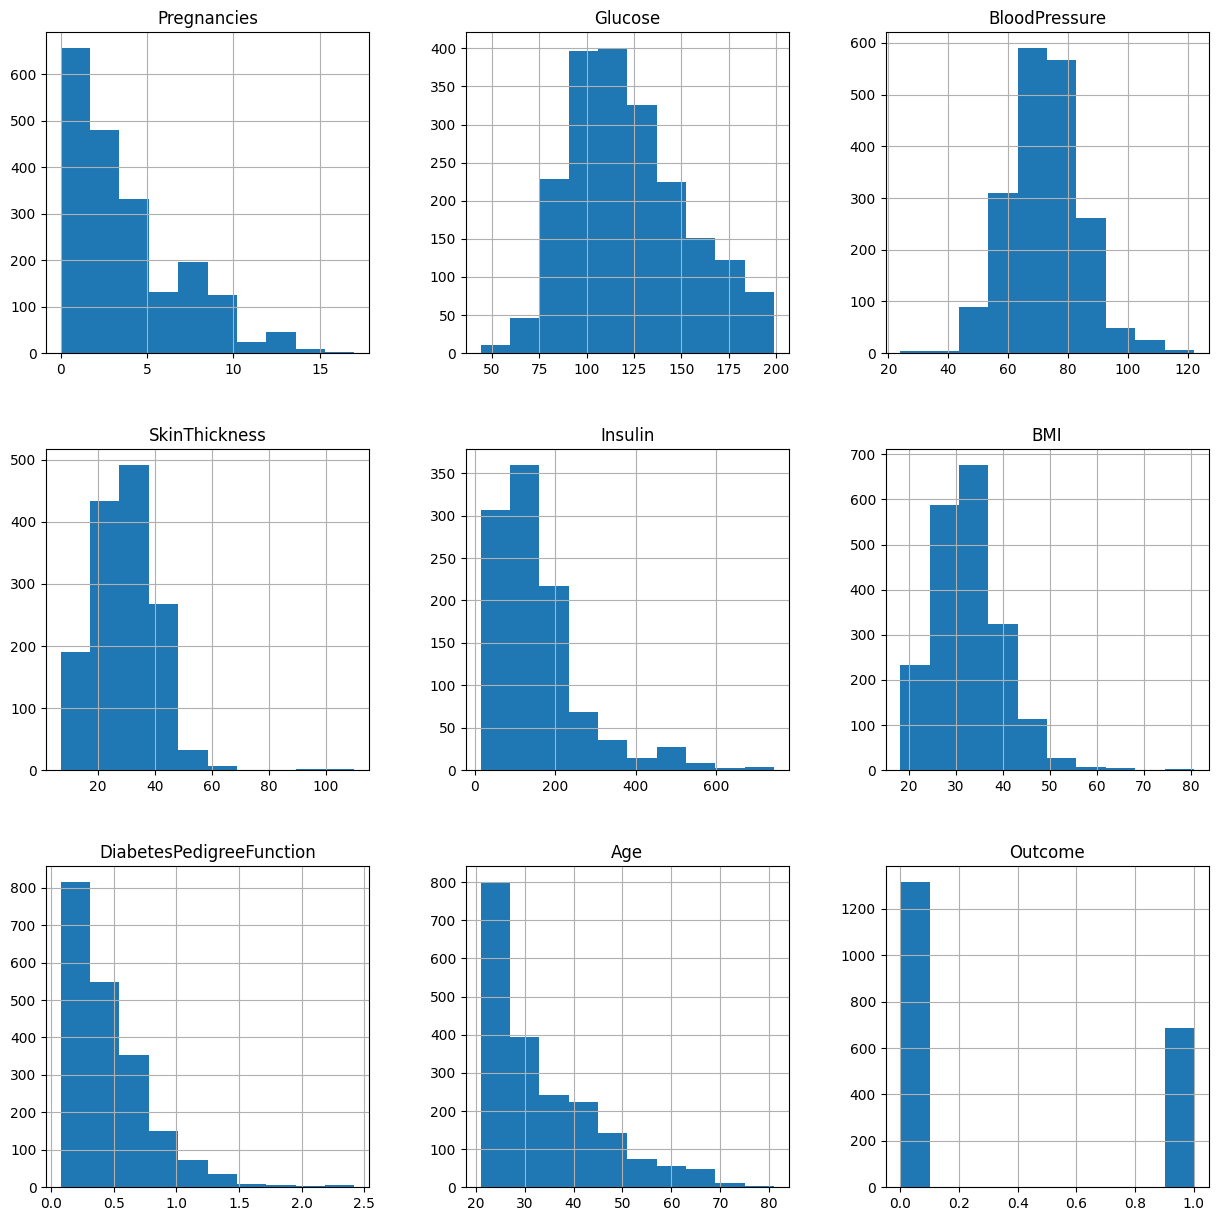

In [4]:
# to fill these non values the data distribution needs to be understand
# pltoting  histogram of dataset before replacing NoN values
p=df_copy.hist(figsize=(15,15))

C:\Users\DELL PC\AppData\Local\Temp\ipykernel_16716\4024032589.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_copy['Glucose'].fillna(df_copy['Glucose'].mean(),inplace=True)
C:\Users\DELL PC\AppData\Local\Temp\ipykernel_16716\4024032589.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behave

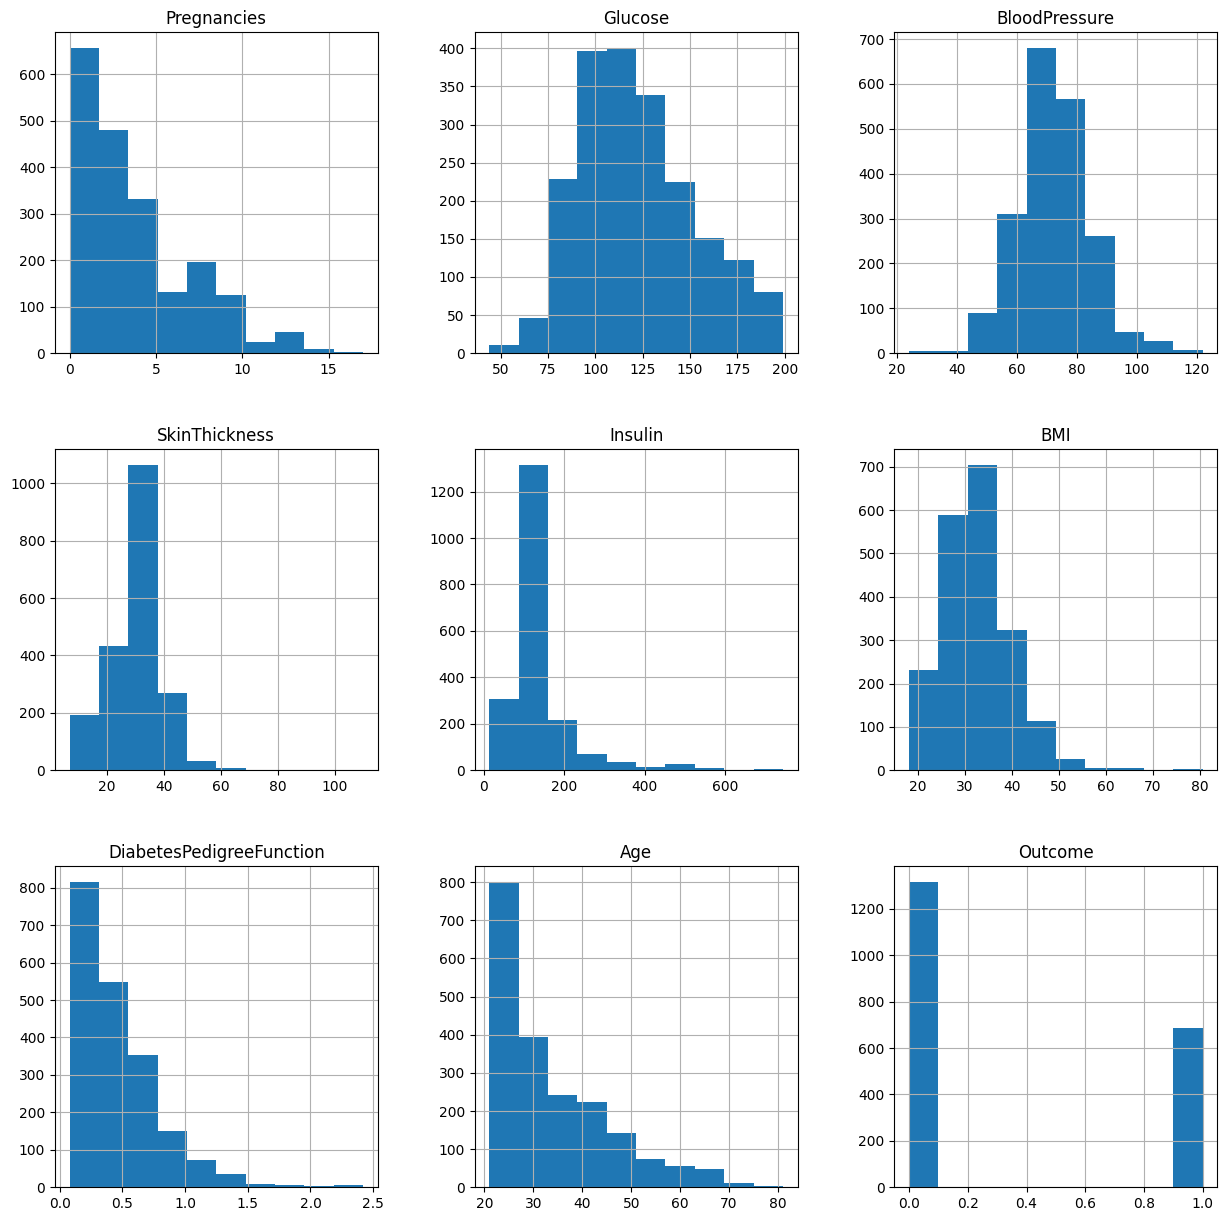

In [5]:
# replacing non values by mean median depending upon distribution 


df_copy['Glucose'].fillna(df_copy['Glucose'].mean(),inplace=True)
df_copy['BloodPressure'].fillna(df_copy['BloodPressure'].mean(),inplace=True)
df_copy['SkinThickness'].fillna(df_copy['SkinThickness'].median(),inplace=True)
df_copy['Insulin'].fillna(df_copy['Insulin'].median(),inplace=True)
df_copy['BMI'].fillna(df_copy['BMI'].median(),inplace=True)

# Plotting histogram of data set after replacing NoN values
p=df_copy.hist(figsize=(15,15))

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               2000 non-null   int64  
 1   Glucose                   2000 non-null   int64  
 2   BloodPressure             2000 non-null   int64  
 3   SkinThickness             2000 non-null   int64  
 4   Insulin                   2000 non-null   int64  
 5   BMI                       2000 non-null   float64
 6   DiabetesPedigreeFunction  2000 non-null   float64
 7   Age                       2000 non-null   int64  
 8   Outcome                   2000 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 140.8 KB


In [7]:
df.isnull().sum() # null value khatam 

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

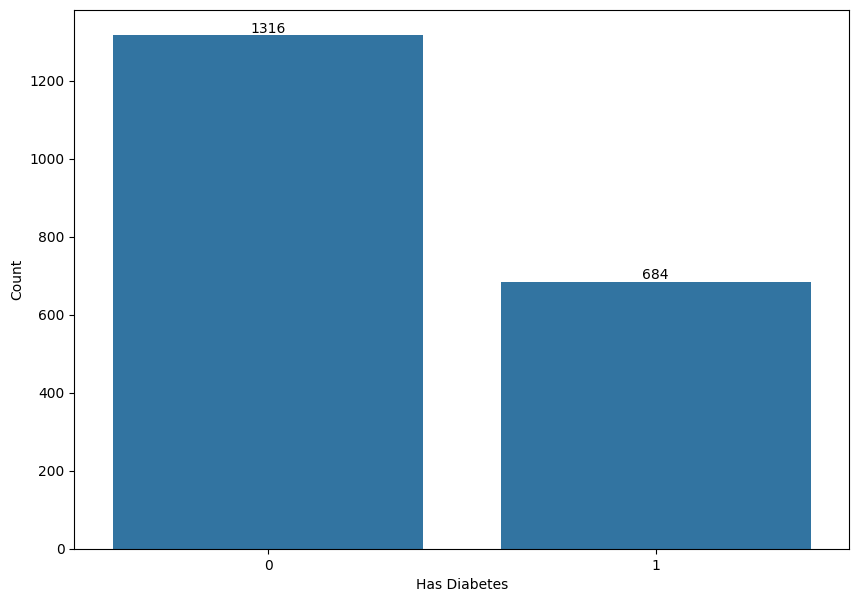

In [8]:
# plottng the outcomes based on the no. of dataset entries

plt.figure (figsize=(10,7))

ax=sns.countplot(x='Outcome',data=df_copy)

for bars in ax.containers:
   ax.bar_label(bars)

plt.xlabel('Has Diabetes')
plt.ylabel('Count')
plt.show()

Text(0.5, 1.0, 'Insulin VS Outcome')

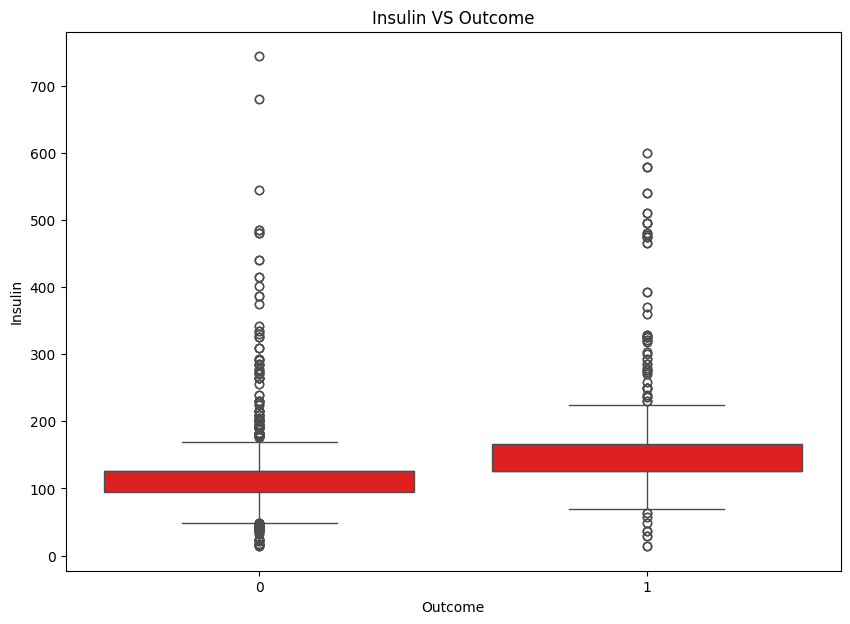

In [9]:
 plt.figure (figsize=(10,7))

sns.boxplot(data=df_copy,x="Outcome",y="Insulin",color="Red")
plt.title("Insulin VS Outcome")

Text(0.5, 1.0, 'BloodPressure VS Outcome')

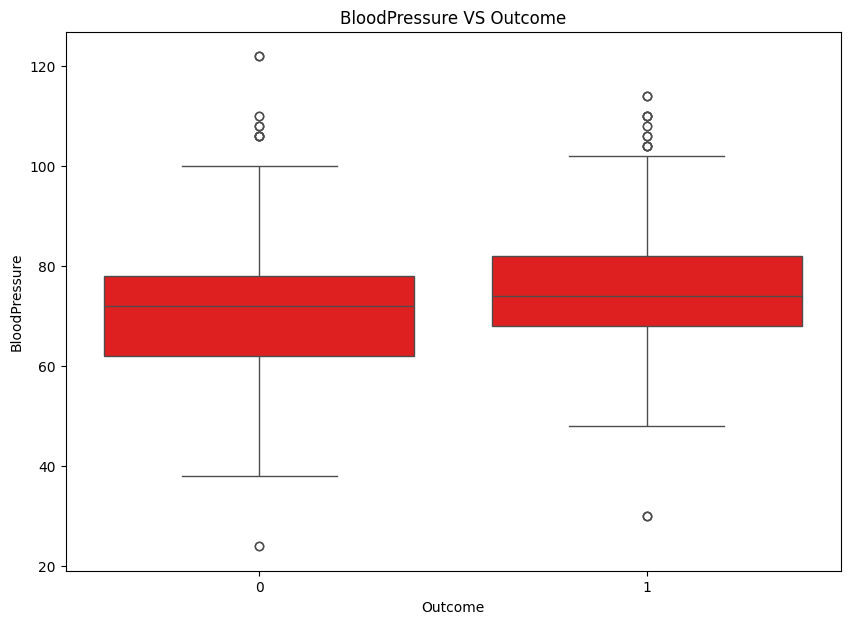

In [10]:
plt.figure (figsize=(10,7))

sns.boxplot(data=df_copy,x="Outcome",y="BloodPressure",color="Red")
plt.title("BloodPressure VS Outcome")

Text(0.5, 1.0, 'BMI VS Outcome')

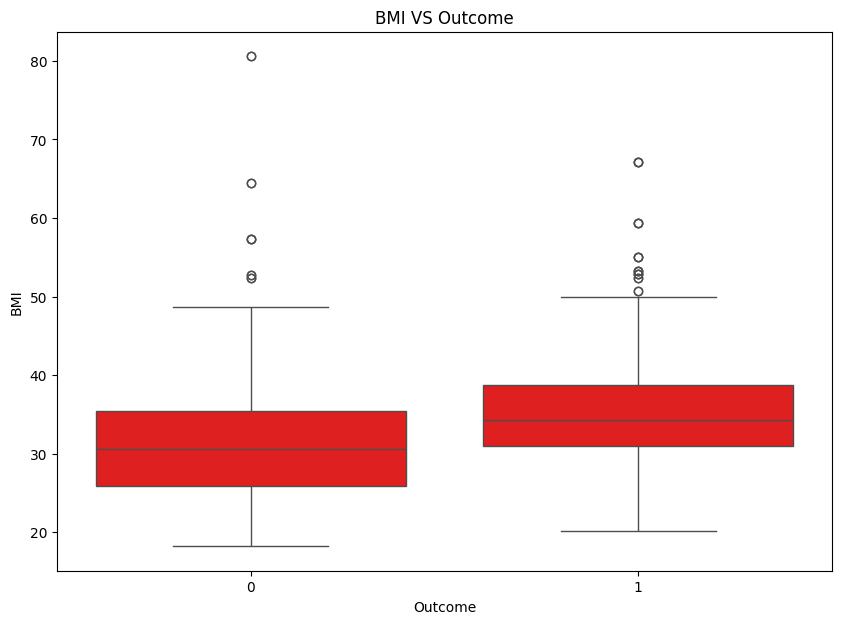

In [11]:
plt.figure (figsize=(10,7))

sns.boxplot(data=df_copy,x="Outcome",y="BMI",color="Red")
plt.title("BMI VS Outcome")

In [12]:
from sklearn.model_selection import train_test_split

X=df_copy.drop(columns='Outcome')
Y=df_copy['Outcome']

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.20,random_state=0)
print('X_train size:(),X_test size:()'.format(X_train.shape,Y_train.shape))
X

X_train size:(),X_test size:()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,2,138.0,62.000000,35.0,126.0,33.6,0.127,47
1,0,84.0,82.000000,31.0,125.0,38.2,0.233,23
2,0,145.0,72.403665,29.0,126.0,44.2,0.630,31
3,0,135.0,68.000000,42.0,250.0,42.3,0.365,24
4,1,139.0,62.000000,41.0,480.0,40.7,0.536,21
...,...,...,...,...,...,...,...,...
1995,2,75.0,64.000000,24.0,55.0,29.7,0.370,33
1996,8,179.0,72.000000,42.0,130.0,32.7,0.719,36
1997,6,85.0,78.000000,29.0,126.0,31.2,0.382,42
1998,0,129.0,110.000000,46.0,130.0,67.1,0.319,26


In [13]:
# feature scaling

from sklearn.preprocessing import StandardScaler
sc =StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)
X_train

array([[ 2.54014777, -0.03778511,  0.47339657, ..., -0.8601368 ,
        -0.65077302,  2.50732972],
       [ 4.06518958,  1.32678364, -0.03517   , ...,  1.120727  ,
         1.04381097,  1.21199837],
       [-0.81494422, -0.65509002,  0.13435219, ...,  0.92814302,
        -0.5475188 ,  0.78022125],
       ...,
       [ 0.10008087, -0.88251815, -0.71325877, ..., -0.10355688,
        -0.94838813, -0.16968841],
       [ 2.23513941, -1.20741547,  0.13435219, ..., -0.36492085,
        -0.52626057,  0.17573329],
       [ 0.40508923,  0.44956087,  0.81244096, ..., -0.04853288,
         0.50628164,  3.11181769]])

In [14]:
from sklearn.model_selection import ShuffleSplit
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

In [15]:
# Initialize the Decision Tree Classifier
model_dt = DecisionTreeClassifier(random_state=42)

# Train the model
model_dt.fit(X_train, Y_train)

# Make predictions
Y_pred_dt = model_dt.predict(X_test)

# Calculate performance metrics
accuracy_dt = accuracy_score(Y_test, Y_pred_dt)
precision_dt = precision_score(Y_test, Y_pred_dt)
recall_dt = recall_score(Y_test, Y_pred_dt)
f1_dt = f1_score(Y_test, Y_pred_dt)
conf_matrix_dt = confusion_matrix(Y_test, Y_pred_dt)
class_report_dt = classification_report(Y_test, Y_pred_dt)

# Print the performance metrics for Decision Tree
print('Decision Tree Metrics:')
print('Accuracy:', round(accuracy_dt, 2))
print('Precision:', round(precision_dt, 2))
print('Recall:', round(recall_dt, 2))
print('F1-Score:', round(f1_dt, 2))
print('Confusion Matrix:\n', conf_matrix_dt)
print('Classification Report:\n', class_report_dt)

Decision Tree Metrics:
Accuracy: 0.91
Precision: 0.81
Recall: 0.93
F1-Score: 0.87
Confusion Matrix:
 [[244  28]
 [  9 119]]
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.90      0.93       272
           1       0.81      0.93      0.87       128

    accuracy                           0.91       400
   macro avg       0.89      0.91      0.90       400
weighted avg       0.91      0.91      0.91       400



In [16]:
# Initialize the Random forest Classifier
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier(n_estimators=100  ,random_state=42)

# Train the model
model_rf.fit(X_train, Y_train)

# Make predictions
Y_pred_rf = model_dt.predict(X_test)

# Calculate performance metrics
accuracy_rf = accuracy_score(Y_test, Y_pred_rf)
precision_rf = precision_score(Y_test, Y_pred_rf)
recall_rf = recall_score(Y_test, Y_pred_rf)
f1_rf = f1_score(Y_test, Y_pred_rf)
conf_matrix_rf = confusion_matrix(Y_test, Y_pred_rf)
class_report_rf = classification_report(Y_test, Y_pred_rf)

# Print the performance metrics for Decision Tree
print('Decision Tree Metrics:')
print('Accuracy:', round(accuracy_rf, 2))
print('Precision:', round(precision_rf, 2))
print('Recall:', round(recall_rf, 2))
print('F1-Score:', round(f1_rf, 2))
print('Confusion Matrix:\n', conf_matrix_rf)
print('Classification Report:\n', class_report_rf)

Decision Tree Metrics:
Accuracy: 0.91
Precision: 0.81
Recall: 0.93
F1-Score: 0.87
Confusion Matrix:
 [[244  28]
 [  9 119]]
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.90      0.93       272
           1       0.81      0.93      0.87       128

    accuracy                           0.91       400
   macro avg       0.89      0.91      0.90       400
weighted avg       0.91      0.91      0.91       400



In [17]:
# Initialize the SVC

model_svm= SVC(random_state=42)

# Train the model
model_svm.fit(X_train, Y_train)

# Make predictions
Y_pred_svm = model_svm.predict(X_test)

# Calculate performance metrics
accuracy_svm = accuracy_score(Y_test, Y_pred_svm)
precision_svm = precision_score(Y_test, Y_pred_svm)
recall_svm = recall_score(Y_test, Y_pred_svm)
f1_svm = f1_score(Y_test, Y_pred_svm)
conf_matrix_svm = confusion_matrix(Y_test, Y_pred_svm)
class_report_svm = classification_report(Y_test, Y_pred_svm)

# Print the performance metrics for Decision Tree
print('Decision Tree Metrics:')
print('Accuracy:', round(accuracy_svm, 2))

print('Precision:', round(precision_svm, 2))
print('Recall:', round(recall_svm, 2))
print('F1-Score:', round(f1_svm, 2))
print('Confusion Matrix:\n', conf_matrix_svm)
print('Classification Report:\n', class_report_svm)

Decision Tree Metrics:
Accuracy: 0.83
Precision: 0.78
Recall: 0.68
F1-Score: 0.72
Confusion Matrix:
 [[247  25]
 [ 41  87]]
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.91      0.88       272
           1       0.78      0.68      0.72       128

    accuracy                           0.83       400
   macro avg       0.82      0.79      0.80       400
weighted avg       0.83      0.83      0.83       400



In [18]:
from sklearn.model_selection import ShuffleSplit,cross_val_score

model=DecisionTreeClassifier(random_state=7)
ssplit=ShuffleSplit(n_splits=10,test_size=0.30)

results=cross_val_score(model,X,Y,cv=ssplit)
print(results)
print("\n Mean Cross-validation Accuracy:",np.mean(results))

[0.945      0.955      0.95666667 0.93666667 0.95166667 0.93666667
 0.935      0.95666667 0.93       0.95166667]

 Mean Cross-validation Accuracy: 0.9454999999999998


In [19]:
from sklearn.model_selection import ShuffleSplit,cross_val_score

model= RandomForestClassifier(n_estimators=100,random_state=7)
ssplit=ShuffleSplit(n_splits=10,test_size=0.30)

results=cross_val_score(model,X,Y,cv=ssplit)
print(results)
print("\n Mean Cross-validation Accuracy:",np.mean(results))

[0.965      0.97666667 0.94166667 0.96       0.94333333 0.95333333
 0.96666667 0.96333333 0.93833333 0.97      ]

 Mean Cross-validation Accuracy: 0.9578333333333333


In [20]:
from sklearn.model_selection import ShuffleSplit,cross_val_score

model= SVC(random_state=7)
ssplit=ShuffleSplit(n_splits=10,test_size=0.30)

results=cross_val_score(model,X,Y,cv=ssplit)
print(results)
print("\n Mean Cross-validation Accuracy:",np.mean(results))

[0.75       0.76       0.735      0.75       0.75666667 0.75833333
 0.75666667 0.75833333 0.77       0.76333333]

 Mean Cross-validation Accuracy: 0.7558333333333334


In [21]:
#PREDICTION 

In [22]:
import pickle
from sklearn.tree import DecisionTreeClassifier 

# example: train amodel 
model_dt=DecisionTreeClassifier ()
model_dt.fit(X_train,Y_train)

# save the trained model to file using pickle
with open('diabetes_model.pkl','wb') as file:
  pickle.dump(model_dt,file)

print("Model saved succefffully")

Model saved succefffully


In [23]:
with open('sc.pkl','wb')as scaler_file:
  pickle.dump(sc,scaler_file)

In [ ]:
import tkinter as tk
import pickle
import numpy as np

# Load the trained Random Forest model
with open('diabetes_model.pkl', 'rb') as model_file:#rb read in binary mode
    model = pickle.load(model_file)

# Load the scaler used during training
with open('sc.pkl', 'rb') as scaler_file:
    scaler = pickle.load(scaler_file)

# Create Tkinter GUI
root = tk.Tk()
root.title("Diabetes Prediction")

# Function to get prediction from input fields
def get_prediction():
    # Get input values from entry fields
    Pregnancies = float(pregnancies_entry.get())
    Glucose = float(glucose_entry.get())
    BloodPressure = float(blood_pressure_entry.get())
    Skinthickness = float(skin_thickness_entry.get())
    Insulin = float(insulin_entry.get())
    Bmi = float(bmi_entry.get())
    Dpf = float(dpf_entry.get())
    Age = float(age_entry.get())

    # Create a numpy array with input values
    input_data = np.array([[Pregnancies,Glucose,BloodPressure,Skinthickness,Insulin,Bmi,Dpf,Age]])

    # Normalize the input data using the scaler
    input_data_scaled = scaler.transform(input_data)

    # Predict using the loaded model
    prediction = model.predict(input_data_scaled)

    # Display prediction result
    if prediction[0] == 1:
        result_label.config(text="Prediction: You have Diabetes.")
    else:
        result_label.config(text="Prediction: You do not have Diabetes.")

# Create labels and entry fields for input features
tk.Label(root, text="Pregnancies").grid(row=0, column=0)
tk.Label(root, text="Glucose").grid(row=1, column=0)
tk.Label(root, text="Blood Pressure").grid(row=2, column=0)
tk.Label(root, text="Skin Thickness").grid(row=3, column=0)
tk.Label(root, text="Insulin").grid(row=4, column=0)
tk.Label(root, text="BMI").grid(row=5, column=0)
tk.Label(root, text="DPF").grid(row=6, column=0)
tk.Label(root, text="Age").grid(row=7, column=0)

pregnancies_entry = tk.Entry(root)
glucose_entry = tk.Entry(root)
blood_pressure_entry = tk.Entry(root)
skin_thickness_entry = tk.Entry(root)
insulin_entry = tk.Entry(root)
bmi_entry = tk.Entry(root)
dpf_entry = tk.Entry(root)
age_entry = tk.Entry(root)

pregnancies_entry.grid(row=0, column=1)
glucose_entry.grid(row=1, column=1)
blood_pressure_entry.grid(row=2, column=1)
skin_thickness_entry.grid(row=3, column=1)
insulin_entry.grid(row=4, column=1)
bmi_entry.grid(row=5, column=1)
dpf_entry.grid(row=6, column=1)
age_entry.grid(row=7, column=1)

# Button to trigger prediction
predict_button = tk.Button(root, text="Predict", command=get_prediction)
predict_button.grid(row=8, columnspan=2)

# Label to display prediction result
result_label = tk.Label(root, text="")
result_label.grid(row=9, columnspan=2)

root.mainloop()

C:\Users\DELL PC\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
streamlit_code = """
import streamlit as st
import pickle
import numpy as np

# Load the trained RandomForest model and scaler
with open('diabetes_model.pkl', 'rb') as model_file:
    model = pickle.load(model_file)

with open('sc.pkl', 'rb') as scaler_file:
    scaler = pickle.load(scaler_file)

# Create the web app
st.title('Diabetes Prediction App')

# Input fields
Pregnancies = st.number_input('Pregnancies', min_value=0.0, max_value=20.0, value=0.0, step=1.0)
Glucose = st.number_input('Glucose', min_value=0.0, max_value=400.0, value=30.0, step=1.0)
BloodPressure = st.number_input('BloodPressure', min_value=0.0, max_value=200.0, value=0.0, step=1.0)
SkinThickness = st.number_input('SkinThickness', min_value=0.0, max_value=200.0, value=0.0, step=1.0)
Insulin = st.number_input('Insulin', min_value=0.0, max_value=700.0, value=0.0, step=1.0)
DiabetesPedigreeFunction = st.number_input('DiabetesPedigreeFunction', min_value=0.0, max_value=2.0, value=0.0, step=0.01)
BMI = st.number_input('BMI', min_value=0.0, max_value=150.0, value=20.0, step=0.1)
Age = st.number_input('Age', min_value=15.0, max_value=100.0, value=25.0, step=1.0)

# Prepare the feature vector
features = np.array([[Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age]], dtype=np.float64)

# Scale the features
features_scaled = scaler.transform(features)

# Predict Diabetes
predicted_Diabetes = model.predict(features_scaled)

prediction_label = "Yes" if predicted_Diabetes[0] == 1 else "No"
st.write(f'Predicted Diabetes: {prediction_label}')
"""

# Saving to file
import os

file_path = os.path.join(os.getcwd(), 'diabetesapp.py')

try:
    with open(file_path, 'w') as file:
        file.write(streamlit_code)
    print(f"File '{file_path}' has been saved.")
except Exception as e:
    print(f"Error saving file: {e}")